In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
PATH_ROOT = "D:/Desktop/Northeastern_University/Research/Proteomics/ProteinProteinAssociation/Development"

In [2]:
def calc_roc_auc(vector_list,label_vector):
    return list(map(lambda x: roc_auc_score(label_vector,x),vector_list))

def calc_roc_fpr_tpr(vector_list,label_vector):
    tuples_to_return = []
    for vector in vector_list:
        fpr,tpr,_ = roc_curve(label_vector, vector)
        tuples_to_return.append((fpr,tpr))
    return tuples_to_return

def draw_roc_curve(vector_list,label_vector,vector_names,sample_source,validation_source):
    fpr_rpr_list = calc_roc_fpr_tpr(vector_list,label_vector)
    auc_list = calc_roc_auc(vector_list,label_vector)
    for i in range(len(vector_list)):
        pyplot.plot(fpr_rpr_list[i][0], fpr_rpr_list[i][1], linestyle='--', label=f'{vector_names[i]} AUC: {auc_list[i]}')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.title(f'ROC Curve of {sample_source}, validated against {validation_source}')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    
def df_roc_analysis(df,vector_col_names,label_col_name,df_sample_source,df_validation_source,include_no_skill=True):
    vectors_to_analyze = []
    for name in vector_col_names:
        vectors_to_analyze.append(df[name].to_numpy())
    label_vector = df[label_col_name].to_numpy()
    if include_no_skill:
        vectors_to_analyze.append(np.zeros(len(label_vector)))
        vector_col_names.append("No Skill")
#     normalized_manhattan_vector = 1 - convert_nan_to_one(df['normalized_manhattan_distance'].to_numpy())
    draw_roc_curve(vectors_to_analyze,label_vector,vector_col_names,df_sample_source,df_validation_source)

In [3]:
def convert_nan_to_zero(vector):
  nan_indices = np.isnan(vector)
  vector[nan_indices] = 0
  return vector

def convert_nan_to_one(vector):
  nan_indices = np.isnan(vector)
  vector[nan_indices] = 1
  return vector

In [5]:
embedding_df_path = f"{PATH_ROOT}/data_sources/ProteomeHD/corum_validated/embeddings/umap/n_50_minDist_35_com_2.csv"
embedding_df = pd.read_csv(embedding_df_path)
embedding_df['nman_dist'] = embedding_df['nman_dist'].apply(lambda x: 1 - x)
embedding_df['euclidean_dist'] = embedding_df['euclidean_dist'].apply(lambda x: 1 - x)
embedding_df['cosine_dist'] = embedding_df['cosine_dist'].apply(lambda x: 1 - x)

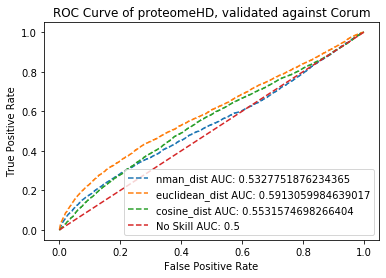

In [6]:
df_roc_analysis(embedding_df,["nman_dist","euclidean_dist","cosine_dist"],"is_validated","proteomeHD","Corum")

In [9]:
embedding_df_path = f"{PATH_ROOT}/data_sources/ProteomeHD/corum_validated/embeddings/umap/n_15_minDist_5_com_2.csv"
embedding_df = pd.read_csv(embedding_df_path)
embedding_df['nman_dist'] = embedding_df['nman_dist'].apply(lambda x: 1 - x)
embedding_df['euclidean_dist'] = embedding_df['euclidean_dist'].apply(lambda x: 1 - x)
embedding_df['cosine_dist'] = embedding_df['cosine_dist'].apply(lambda x: 1 - x)

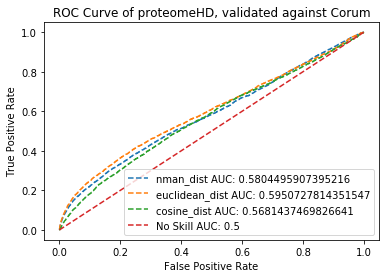

In [10]:
df_roc_analysis(embedding_df,["nman_dist","euclidean_dist","cosine_dist"],"is_validated","proteomeHD","Corum")

In [ ]:
embedding_df_path = f"{PATH_ROOT}/data_sources/ProteomeHD/corum_validated/combined_max_10_pairs_per_complex.csv
embedding_df = pd.read_csv(embedding_df_path)
embedding_df['nman_dist'] = embedding_df['nman_dist'].apply(lambda x: 1 - x)
embedding_df['euclidean_dist'] = embedding_df['euclidean_dist'].apply(lambda x: 1 - x)

In [11]:
embedding_df

,protein1,protein2,is_validated,nman_dist,euclidean_dist,cosine_dist
0,P09488,O75410,0,0.392186,-6.194732,0.982812
1,Q9Y6K9,Q69YQ0,0,0.501550,-4.270504,0.913576
2,Q6NUS8,Q13442,0,0.488859,-6.670210,0.763192
3,O14924,P09429,0,0.268577,-8.351142,0.501061
4,Q04323,P55212,0,0.298417,-6.081311,0.613440
...,...,...,...,...,...,...
104552,Q12802,Q16539,1,0.642418,-2.113811,0.993724
104553,Q12802,Q9NYL2,1,0.970247,0.749772,0.999998
104554,Q16512,Q16539,1,0.868811,0.347913,0.992875
104555,Q16512,Q9NYL2,1,0.627627,-2.019304,0.999986
